# Description: Sentiment analysis using twitter datas

In [70]:
#import library


import tweepy
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter


plt.style.use('fivethirtyeight')


In [33]:
ipl = pd.read_csv('ipl2020.csv')

In [34]:
ipl.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Deepak Ostwal,NaN,NaN,2017-01-04 13:31:10,343,350,61844,False,2020-09-16 20:47:03,No Ill feeling towards Stokes but I think we w...,NaN,Twitter for Android,False
1,Cricket Mantri,India,"8k Followers on Instagram.\nUnbiased, Accurate...",2019-09-02 13:51:04,9,0,164,False,2020-09-16 20:46:39,Take a Bow Alex Carey 👏\n\n•The Images/Photos ...,NaN,Twitter for Android,False
2,Captain Kane,Earth,"[ Life long Brendon McCullum, Kane Williamson ...",2011-04-24 09:06:16,263,0,2051,False,2020-09-16 20:46:19,Seems like memory of you're brain chip already...,NaN,Twitter for Android,False
3,Bhoomish Banewal,"New Delhi, India",I watch a lot of movies and tv shows...and tha...,2013-07-10 11:23:43,31,121,15897,False,2020-09-16 20:42:09,I honestly feel for #morgan . He is a brillian...,['morgan'],Twitter for Android,False
4,🏏FlashScore Cricket Commentators,Global,Official account of the FlashScore cricket com...,2018-01-24 14:35:45,21178,769,4439,True,2020-09-16 20:41:36,What a summer of cricket we have had!\n\nThank...,NaN,Twitter Web App,False


In [58]:
ipl2 = ipl.copy(deep=True)

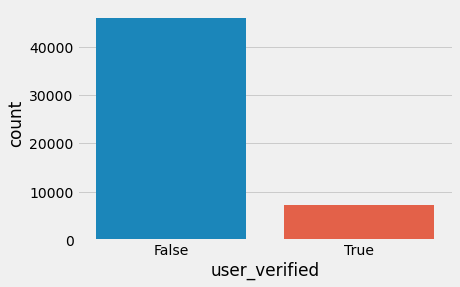

In [59]:
sns.countplot(x='user_verified' , data=ipl2)

# Check user verified tweeter

In [60]:
verified_people = ipl2[ipl2['user_verified']==True]

In [61]:
verified_people.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
4,🏏FlashScore Cricket Commentators,Global,Official account of the FlashScore cricket com...,2018-01-24 14:35:45,21178,769,4439,True,2020-09-16 20:41:36,What a summer of cricket we have had!\n\nThank...,NaN,Twitter Web App,False
15,DT Next,"Chennai, India",English language newspaper by the Daily Thanth...,2015-10-23 12:33:47,6385,422,147,True,2020-09-16 20:32:51,Chennai Super Kings (#CSK) batsman #RuturajGai...,"['CSK', 'RuturajGaikwad', 'COVID19']",Twitter Web App,False
25,Saurabh Somani,Bangalore,"Wodehouse, Douglas Adams, House, Federer, Dire...",2009-11-24 19:29:22,5312,840,2338,True,2020-09-16 20:29:08,"Glenn Maxwell, man of the match &amp; man of t...",NaN,Twitter Web App,False
80,Jatin Sapru,Mumbai,"Yup, That Cricket Guy | Instagram - Jatin_Sapr...",2009-07-18 23:24:51,315098,488,5379,True,2020-09-16 20:17:02,WHAT A GAME.. Time to hit the sack while Manch...,NaN,Twitter for iPhone,False
183,Circle of Cricket,NaN,"For all the latest cricket updates, follow us!...",2011-03-02 18:21:08,110125,818,255,True,2020-09-16 19:00:08,"“Rather than giving the batsman out, five pena...",NaN,Buffer,False


In [62]:
verified_people.shape

(7199, 13)

In [63]:
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [64]:
punct = string.punctuation
nlp = spacy.load('en_core_web_sm')

In [81]:
def change_into_tokens(text):
    text = re.sub('\W+' , ' ' , text)
    text = text.replace('https' , ' ')
    
    doc= nlp(text)
    
    tokens = []
    cleaned_text = []
    
    for token in doc:
        if token.lemma_ != '-PRON-':
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
        
    for token in tokens:
        if token not in STOP_WORDS and token not in punct:
            cleaned_text.append(token)
            
    return cleaned_text


In [83]:
change_into_tokens('I like apples')

['like', 'apple']

In [84]:
verified_tweet = verified_people['text'].apply(change_into_tokens)

In [68]:
verified_tweet.head()

4      [summer, cricket, -PRON-, thank, team, brave, ...
15     [chennai, super, kings, csk, batsman, ruturajg...
25     [glenn, maxwell, man, match, amp, man, series,...
80     [game, time, hit, sack, manchester, airport, p...
183    [batsman, penalty, run, add, erring, team, ump...
Name: text, dtype: object

In [85]:
#make wordcloud

verified_tweets = ''

for tweet in verified_tweet:
    verified_tweets +=(' '.join(tweet))


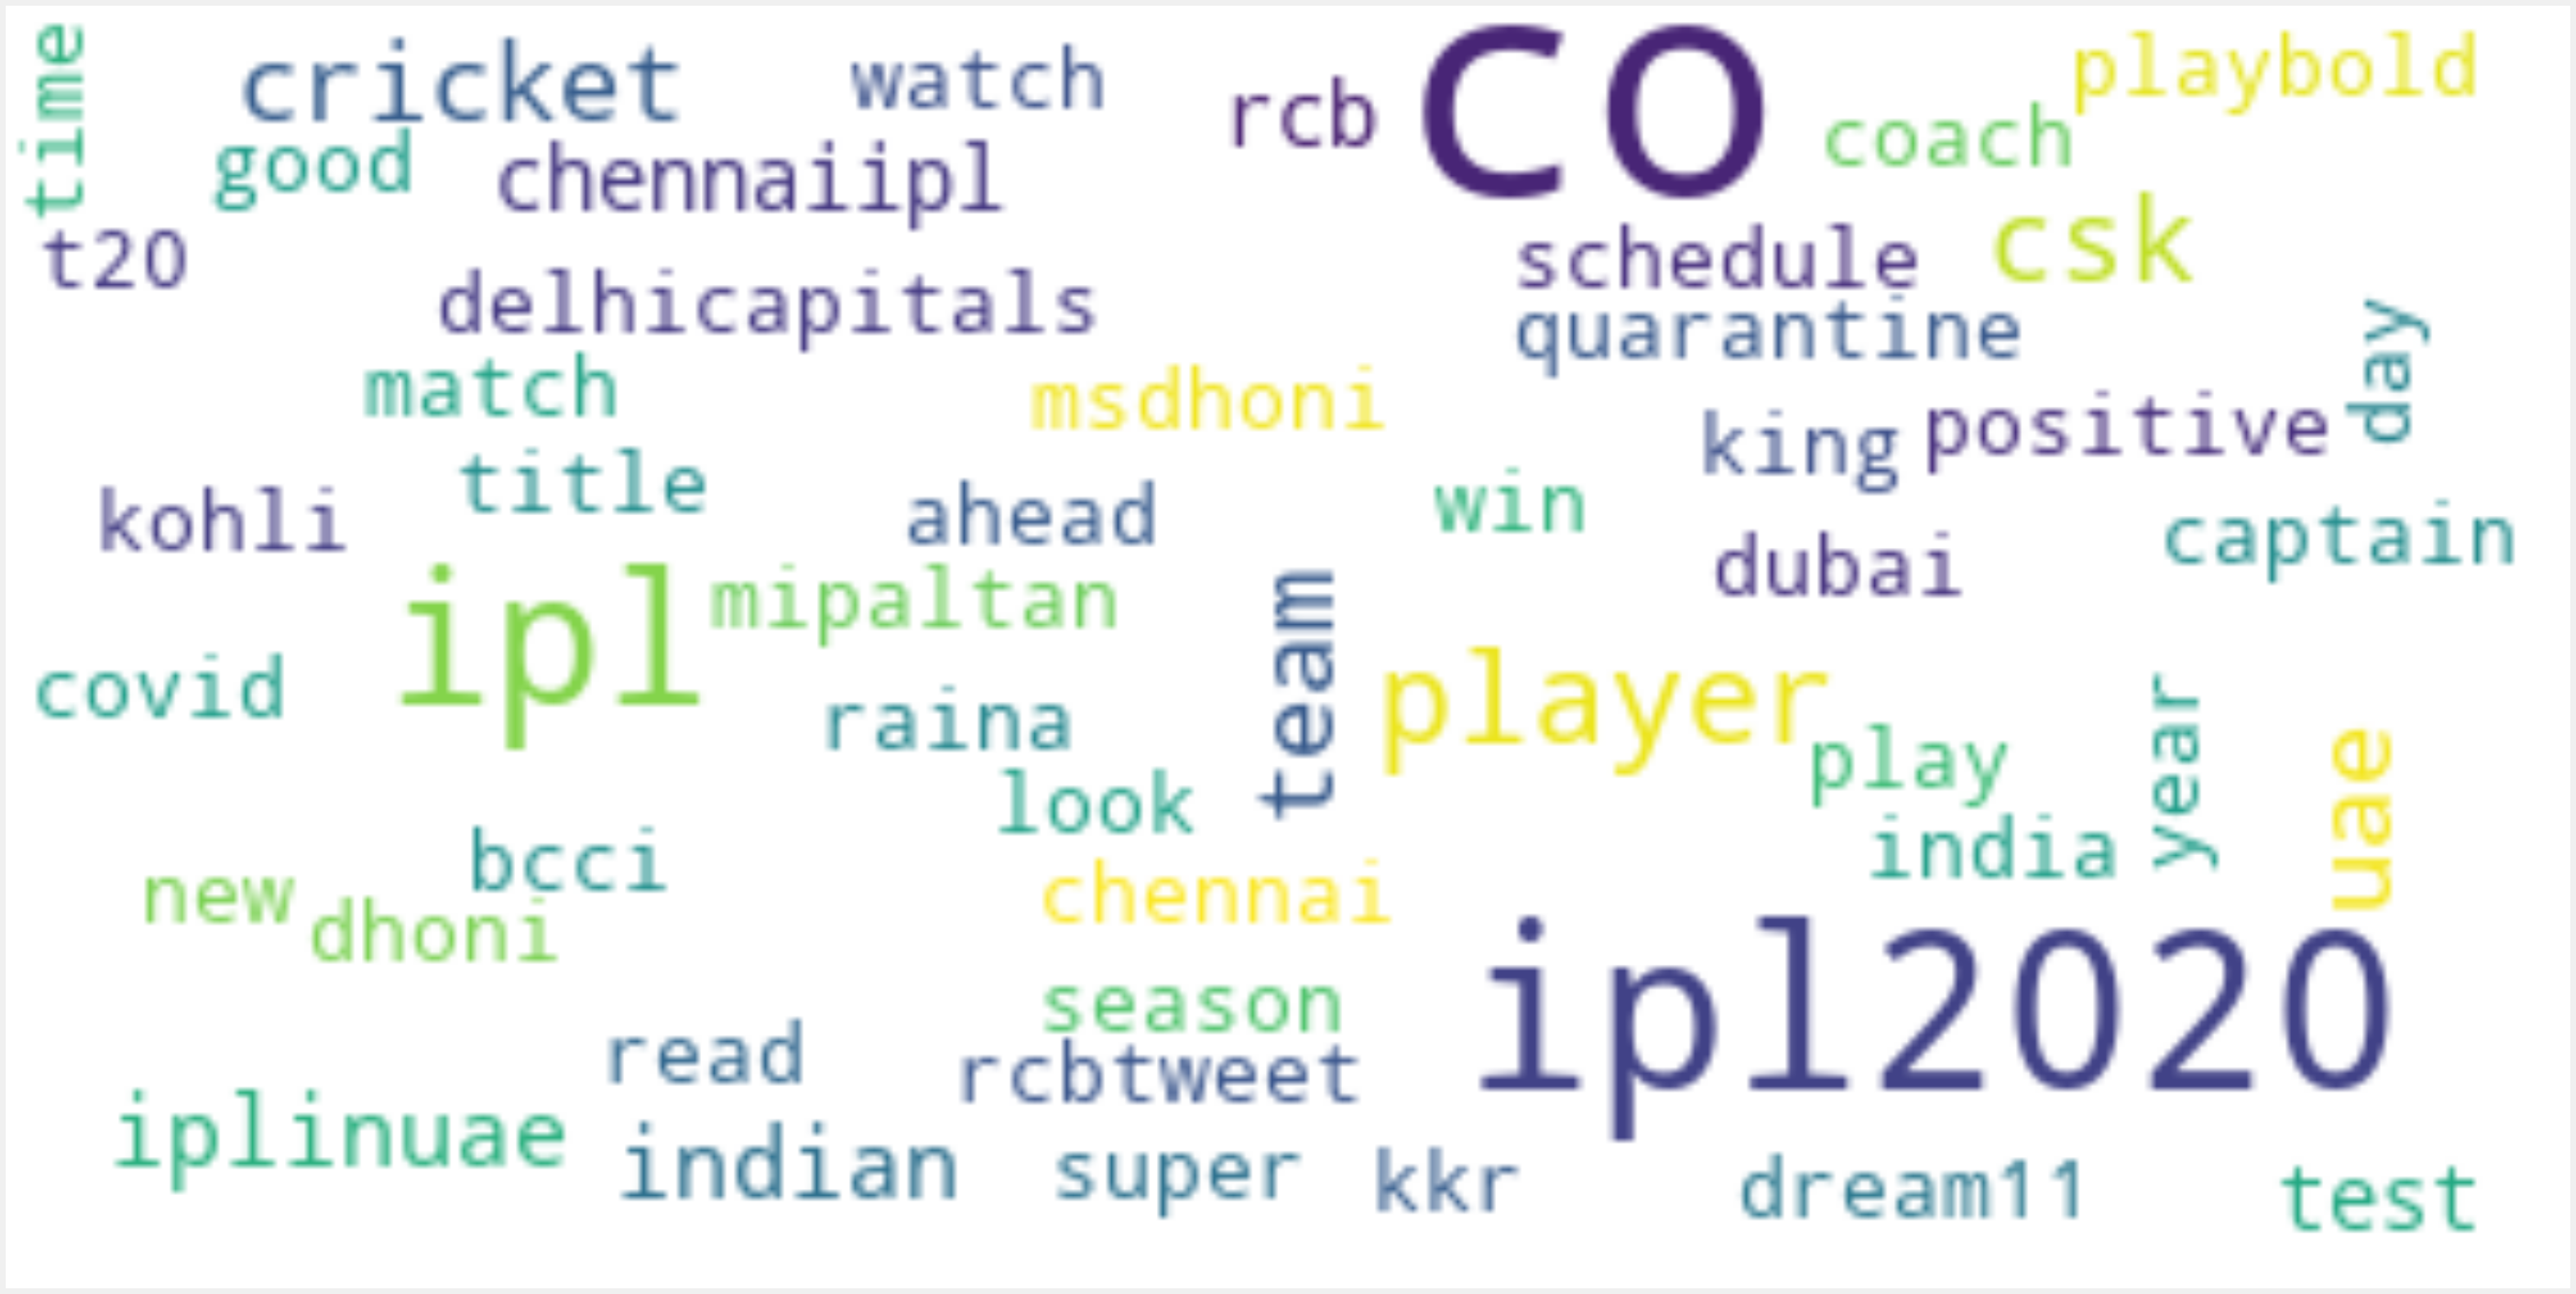

In [91]:
fig , ax = plt.subplots(figsize=(50,50))

wordcloud = WordCloud(max_font_size=50,max_words=50, collocations=  False , background_color='white').generate(verified_tweets)

plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.show()

In [94]:
Counter(verified_tweets.split(' ')).most_common()

[('t', 7666),
 ('co', 7333),
 ('ipl2020', 3053),
 ('ipl', 2068),
 ('s', 1383),
 ('2020', 730),
 ('player', 680),
 ('csk', 628),
 ('uae', 578),
 ('cricket', 540),
 ('team', 540),
 ('iplinuae', 425),
 ('rcb', 351),
 ('chennaiipl', 336),
 ('test', 317),
 ('bcci', 306),
 ('day', 296),
 ('delhicapitals', 289),
 ('msdhoni', 282),
 ('play', 282),
 ('schedule', 275),
 ('dubai', 266),
 ('season', 261),
 ('watch', 256),
 ('read', 256),
 ('ahead', 254),
 ('dhoni', 250),
 ('indian', 248),
 ('title', 247),
 ('19', 235),
 ('dream11', 233),
 ('coach', 221),
 ('raina', 216),
 ('match', 211),
 ('win', 210),
 ('india', 204),
 ('time', 203),
 ('look', 203),
 ('kohli', 201),
 ('captain', 199),
 ('covid', 195),
 ('new', 193),
 ('kkr', 191),
 ('super', 189),
 ('chennai', 187),
 ('positive', 184),
 ('year', 184),
 ('good', 183),
 ('mipaltan', 170),
 ('playbold', 168),
 ('quarantine', 166),
 ('20', 164),
 ('indians', 162),
 ('t20', 162),
 ('start', 160),
 ('kings', 158),
 ('sponsorship', 158),
 ('bowler', 155

In [99]:
verified_people['user_name'].value_counts()[:10]

Circle of Cricket              518
Republic                       355
SportsFlashes                  277
Royal Challengers Bangalore    274
DNA                            257
CricketNDTV                    253
CricketNext                    225
LatestLY                       220
TOI Sports                     214
HT Sports                      209
Name: user_name, dtype: int64

# Circle of Cricket

In [101]:
circle_of_cricket = verified_people[verified_people['user_name'] == 'Circle of Cricket']

In [103]:
circle_of_cricket.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
183,Circle of Cricket,NaN,"For all the latest cricket updates, follow us!...",2011-03-02 18:21:08,110125,818,255,True,2020-09-16 19:00:08,"“Rather than giving the batsman out, five pena...",NaN,Buffer,False
264,Circle of Cricket,NaN,"For all the latest cricket updates, follow us!...",2011-03-02 18:21:08,110125,818,255,True,2020-09-16 18:00:51,James Pattinson looks forward to teaming up wi...,"['MumbaiIndians', 'IPL2020']",Buffer,False
406,Circle of Cricket,NaN,"For all the latest cricket updates, follow us!...",2011-03-02 18:21:08,110125,818,255,True,2020-09-16 17:00:50,“I don’t like to bowl to Russell during the ne...,NaN,Buffer,False
518,Circle of Cricket,NaN,"For all the latest cricket updates, follow us!...",2011-03-02 18:21:08,110125,818,255,True,2020-09-16 16:23:02,"#DelhiCapitals stars @SDhawan25, @KagisoRabada...",['DelhiCapitals'],Buffer,False
598,Circle of Cricket,NaN,"For all the latest cricket updates, follow us!...",2011-03-02 18:21:08,110125,818,255,True,2020-09-16 15:55:08,"“As a captain, he (Dhoni) is quite conservativ...",NaN,Buffer,False


In [104]:
coc_tweets = circle_of_cricket['text']

In [105]:
coc_tweets

183      “Rather than giving the batsman out, five pena...
264      James Pattinson looks forward to teaming up wi...
406      “I don’t like to bowl to Russell during the ne...
518      #DelhiCapitals stars @SDhawan25, @KagisoRabada...
598      “As a captain, he (Dhoni) is quite conservativ...
                               ...                        
51326    ”People do not want Chinese products or firms ...
51851    'Hitman' @ImRo45 waiting for Sept 19 to see 'C...
52150    Tata joins the race for #IPL2020 title sponsor...
52683    .@RCBTweets skipper @imVkohli expresses happin...
53007    .@ChennaiIPL batting coach @mhussey393 feels t...
Name: text, Length: 518, dtype: object

In [107]:
#now do tokenization

coc_cleaned_tweets = coc_tweets.apply(change_into_tokens)

In [109]:
coc_cleaned_tweets

183      [batsman, penalty, run, add, erring, team, ump...
264      [james, pattinson, look, forward, team, jaspri...
406      [don, t, like, bowl, russell, net, session, te...
518      [delhicapitals, star, sdhawan25, kagisorabada2...
598      [captain, dhoni, conservative, tactic, wait, m...
                               ...                        
51326    [people, want, chinese, product, firm, associa...
51851    [hitman, imro45, wait, sept, 19, captain, cool...
52150    [tata, join, race, ipl2020, title, sponsorship...
52683    [rcbtweets, skipper, imvkohli, express, happin...
53007    [chennaiipl, batting, coach, mhussey393, feel,...
Name: text, Length: 518, dtype: object

In [110]:
#now make wordcloud

coc_cleaned_tweets_all = ''

for tweet in coc_cleaned_tweets:
    coc_cleaned_tweets_all += (' '.join(tweet))

In [111]:
coc_cleaned_tweets_all

'batsman penalty run add erring team umpire feel t t co jfefnzgcayjames pattinson look forward team jasprit bumrah mumbaiindians ipl2020 t co n9zc6fyzkidon t like bowl russell net session tend scared big o t co gitlh0yvfqdelhicapitals star sdhawan25 kagisorabada25 anrichnortje02 fun recreate english char t co jpelt5y6cecaptain dhoni conservative tactic wait mistake t co ddzgr0b4ymrishabhpant17 warm ipl2020 mind boggling shoot imishant practice delhicapitals t co bkdih1o9cxstat fact ipl journey delhicapitals ipl2020 t co 6wiy6xv2rqnew ball talented player hear gilchrist good thing h t co grrgvy0ivsnice test mental strength s like big boss bio bubble new thing t co bnpqcyry8ls statistical look ipl journey rcbtweet rcb playbold ipl2020 t co haj8mpkxslrealpreityzinta record special message kxip boy ahead season ipl2020 t co k6n0axgluykp24 pull leg delhicapitals coach rickyponting post picture notebook hand t co ixsnicq2ouactor varun_dvn compliment imvkohli work body ipl2020 t co 9lca0lya6z

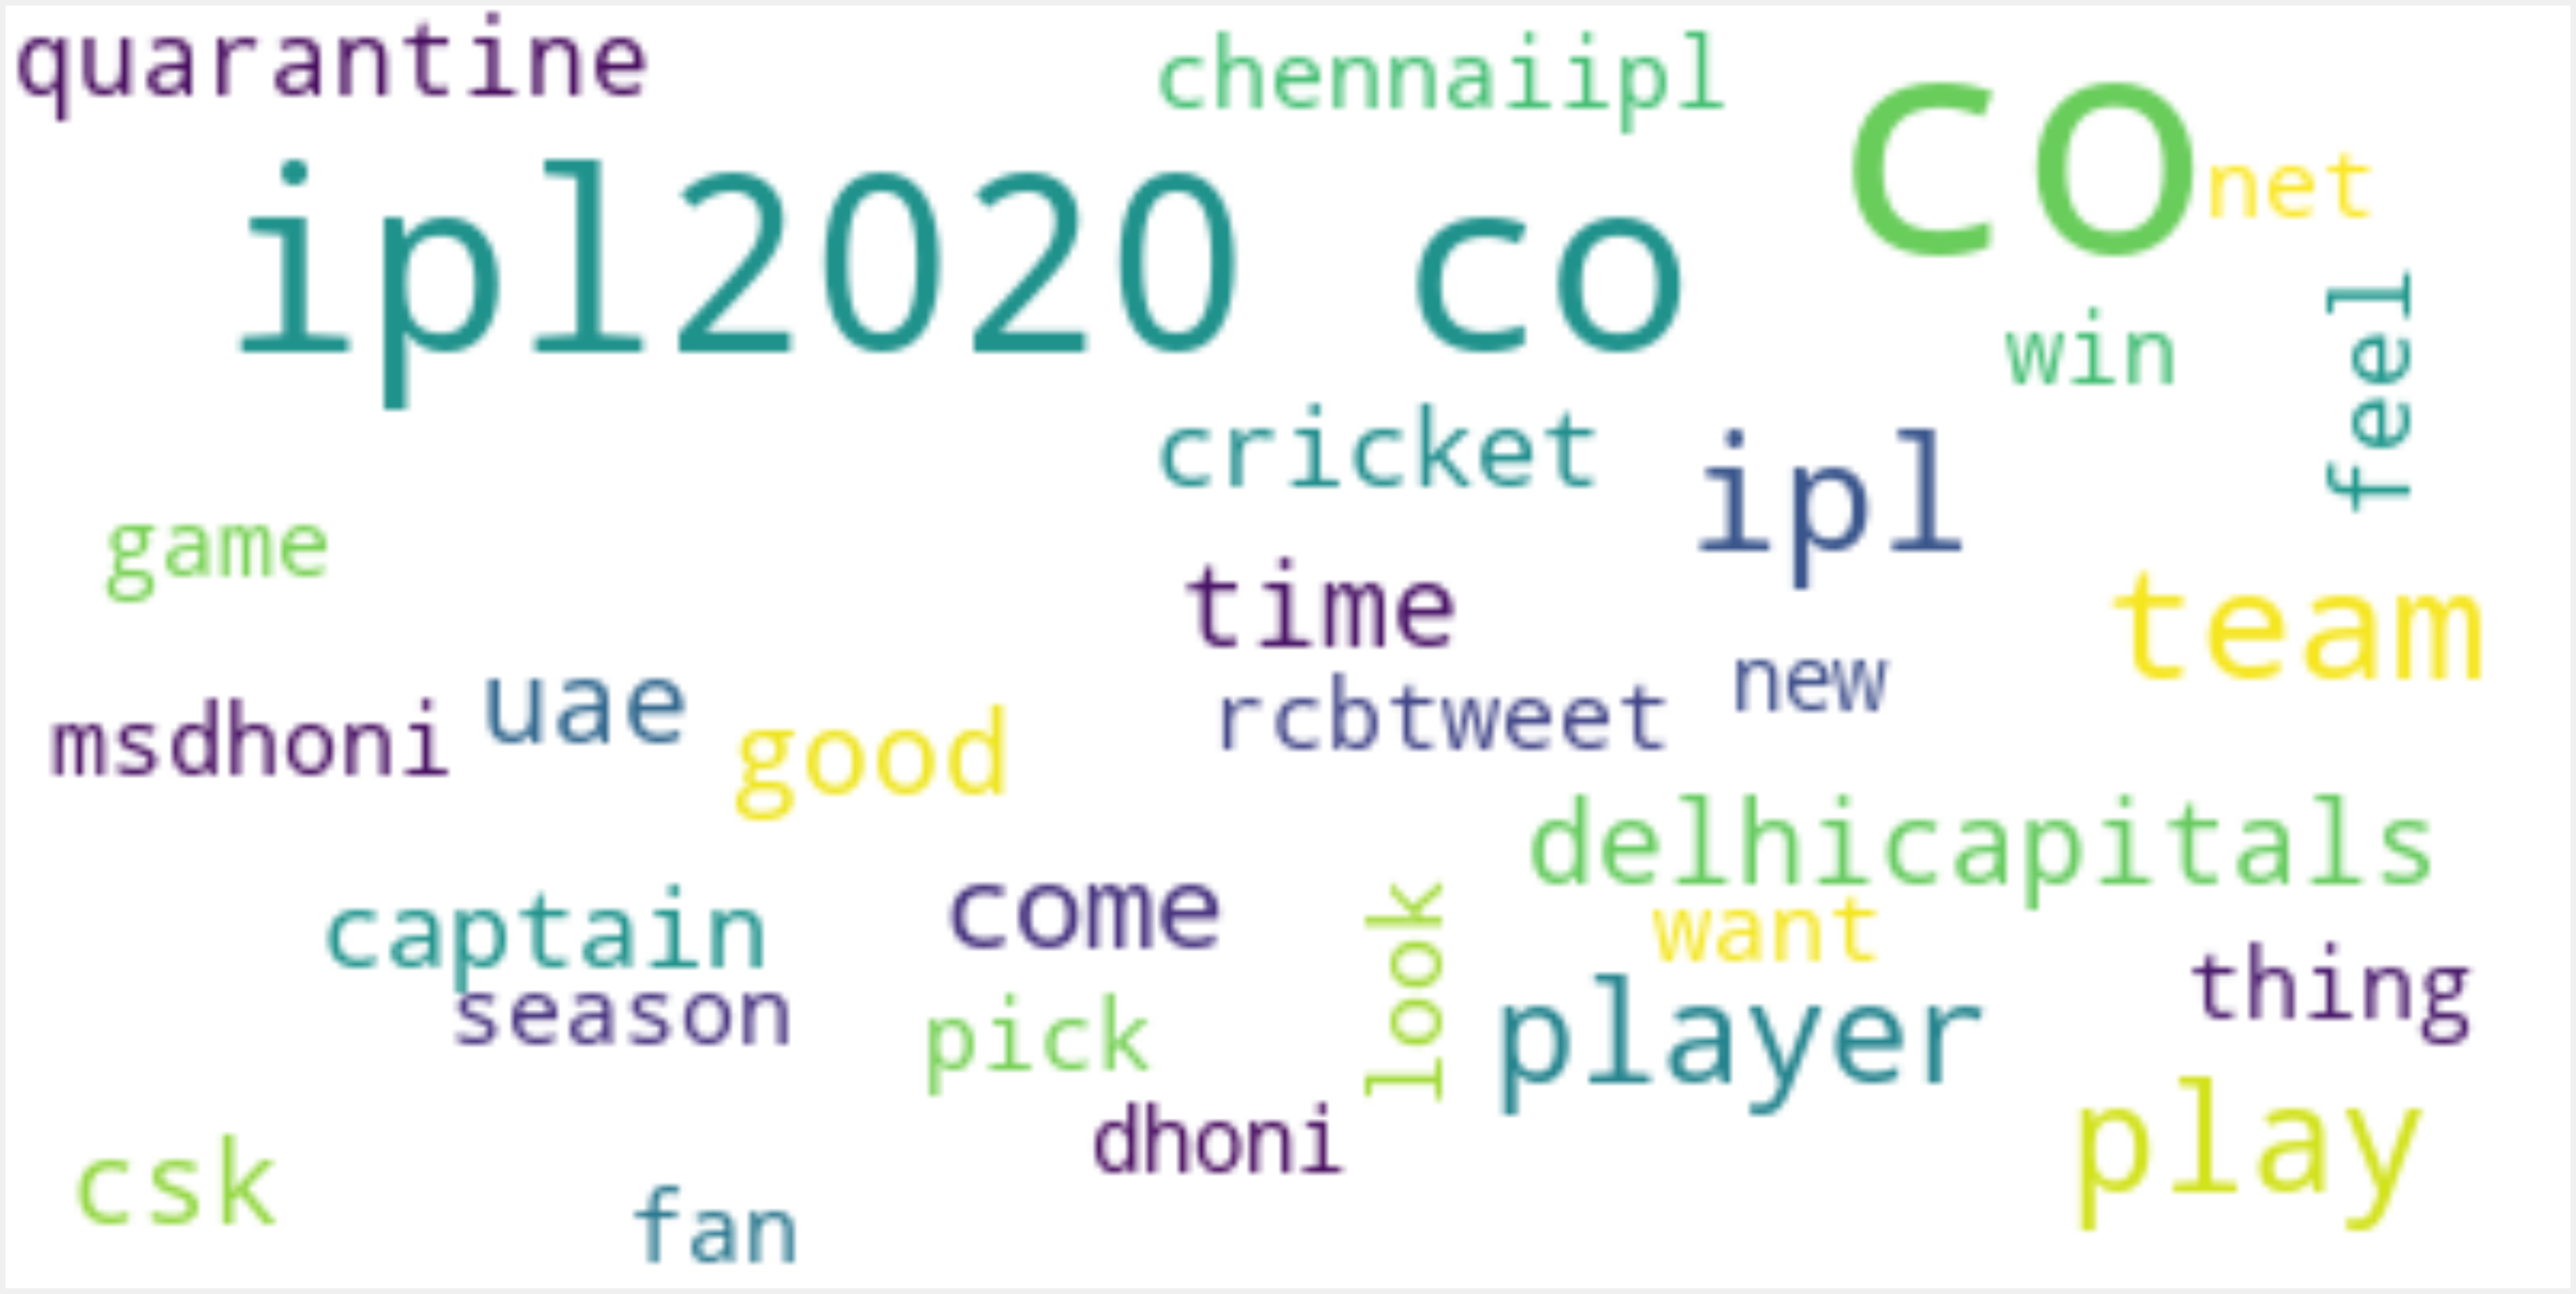

In [113]:
#now make wordcloud


fig , ax = plt.subplots(figsize=(50,50))

wordcloud = WordCloud(max_font_size=50 , max_words=30 , background_color='white').generate(coc_cleaned_tweets_all)

plt.imshow(wordcloud , interpolation='bilinear')

plt.axis('off')

plt.show()

In [114]:
#count text occuracnes in circle of cricket tweets

Counter(coc_cleaned_tweets_all.split(' ')).most_common()

[('t', 545),
 ('co', 521),
 ('ipl2020', 216),
 ('s', 96),
 ('ipl', 79),
 ('team', 55),
 ('play', 42),
 ('player', 37),
 ('good', 36),
 ('come', 28),
 ('delhicapitals', 27),
 ('uae', 25),
 ('dubai', 25),
 ('time', 24),
 ('csk', 23),
 ('captain', 23),
 ('cricket', 23),
 ('dhoni', 21),
 ('quarantine', 21),
 ('net', 20),
 ('coach', 20),
 ('look', 19),
 ('session', 19),
 ('practice', 19),
 ('feel', 18),
 ('xi', 18),
 ('test', 17),
 ('season', 16),
 ('game', 16),
 ('edition', 16),
 ('msdhoni', 16),
 ('like', 15),
 ('thing', 15),
 ('tournament', 15),
 ('want', 15),
 ('indian', 15),
 ('chennaiipl', 15),
 ('fan', 15),
 ('skipper', 15),
 ('new', 14),
 ('pick', 14),
 ('bowler', 14),
 ('raina', 14),
 ('win', 14),
 ('fact', 13),
 ('13th', 13),
 ('room', 13),
 ('rcbtweet', 12),
 ('imvkohli', 12),
 ('day', 12),
 ('abu', 12),
 ('dhabi', 12),
 ('know', 12),
 ('year', 12),
 ('share', 12),
 ('19', 12),
 ('journey', 11),
 ('ahead', 11),
 ('spinner', 11),
 ('title', 11),
 ('match', 11),
 ('lot', 11),
 ('co